In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing
import sklearn.metrics

import cuml.ensemble
import sklearn.ensemble


In [22]:
df = pd.read_parquet('data/trab_rays.parquet')
df

,depth,ns_angle,vs_angle,ap_translation,ml_translation,ray_dist,name,ns_angle_orig,vs_angle_orig
0,-5,-10,-10,-5,-5,39.094397,S202501L_trab,130.752263,49.570700
1,-5,-10,-10,-5,-4,38.368834,S202501L_trab,130.752263,49.570700
2,-5,-10,-10,-5,-3,37.698466,S202501L_trab,130.752263,49.570700
3,-5,-10,-10,-5,-2,37.002025,S202501L_trab,130.752263,49.570700
4,-5,-10,-10,-5,-1,36.318150,S202501L_trab,130.752263,49.570700
...,...,...,...,...,...,...,...,...,...
586966,5,10,10,5,1,30.992991,171263R_trab,128.063086,33.544032
586967,5,10,10,5,2,30.719992,171263R_trab,128.063086,33.544032
586968,5,10,10,5,3,30.456661,171263R_trab,128.063086,33.544032
586969,5,10,10,5,4,30.131276,171263R_trab,128.063086,33.544032


In [23]:
# split
features = ['depth','ns_angle','vs_angle','ap_translation','ml_translation']
X = df[features].values
y = df[['ray_dist']].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# train and search for hyperparametrs with gridsearch
params = {
    'n_estimators': [10, 30, 50],
    'max_depth': [10, 20, 50],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

rf = cuml.ensemble.RandomForestRegressor()
grid = GridSearchCV(rf, params, cv=3, scoring='r2')
grid.fit(X_train, y_train)


/home/gspangen/mambaforge/envs/tf-rapids/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/home/gspangen/mambaforge/envs/tf-rapids/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/home/gspangen/mambaforge/envs/tf-rapids/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/home/gspangen/mambaforge/envs/tf-rapids/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/home/gspangen/mambaforge/envs/tf-rapids/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: To 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50],
                         'n_estimators': [10, 30, 50]},
             scoring='r2')

In [14]:
rf = sklearn.lin

{'max_depth': 10, 'n_estimators': 50}

In [18]:
rf = sklearn.ensemble.RandomForestRegressor(max_depth=10, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [19]:
y_pred = rf.predict(X_test)

# metrics for regression
print(f"r2: {sklearn.metrics.r2_score(y_test, y_pred)}")
print(f"mse: {sklearn.metrics.mean_squared_error(y_test, y_pred)}")
print(f"mae: {sklearn.metrics.mean_absolute_error(y_test, y_pred)}")
print(f"explained variance: {sklearn.metrics.explained_variance_score(y_test, y_pred)}")



r2: 0.5216084880702928
mse: 16.443638694313734
mae: 3.2470797509408507
explained variance: 0.5216085110246307


Exception ignored in: <bound method RandomForestRegressor.__del__ of RandomForestRegressor()>
Traceback (most recent call last):
  File "randomforestregressor.pyx", line 326, in cuml.ensemble.randomforestregressor.RandomForestRegressor.__del__
  File "randomforestregressor.pyx", line 330, in cuml.ensemble.randomforestregressor.RandomForestRegressor._reset_forest_data
  File "base.pyx", line 312, in cuml.internals.base.Base.__getattr__
AttributeError: rf_forest


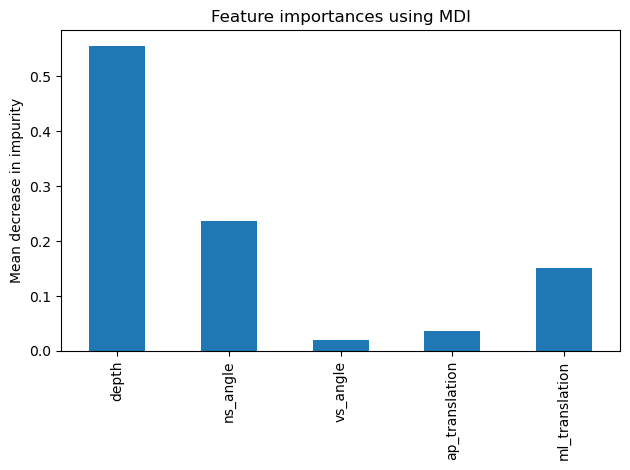

In [20]:
# plot feature importantces

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



